In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
color_palette = sns.color_palette("husl", 8) 

In [85]:
file_path = './Data/us.xlsx'

tokens_paid_df = pd.read_excel(file_path, sheet_name='Tokens Paid')

print(tokens_paid_df.head())

      Name Lead ID created_date  paid_date    cohort              source  \
0  Saurabh     NaN   2024-03-01 2024-03-07  Cohort 2                 NaN   
1  Sudheer     NaN   2023-08-25 2023-08-30  Cohort 1            LinkedIn   
2   Swathi     NaN   2023-09-19 2023-10-06  Cohort 1            LinkedIn   
3    Kabir     NaN   2024-03-21 2024-03-23  Cohort 2  Inbound Phone Call   
4   Vikash     NaN   2023-08-05 2023-08-14  Cohort 1            LinkedIn   

               agent        counsellor                           prospect_id  \
0        Sonu Mishra  Rishabh Tripathi                                   NaN   
1    Shaqlain Sheikh  Shailendra singh  d7d7ba30-8207-4a00-a2f0-72c9718a9ad7   
2              Rohit             Aarti  9f8bb6d3-d30e-4f73-baa8-8e1ae4dd3517   
3  Siddharth Goswami     Aviral Sharma  0acf038e-e696-11ee-807d-02e22ea38447   
4    Shaqlain Sheikh            zareen  aa13b8b9-cff5-41fe-a1f5-353e4c90ab04   

   upload_timestamp        status  
0               NaN  ACTIV

In [86]:
tokens_paid_df.head()

,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,upload_timestamp,status
0,Saurabh,NaN,2024-03-01,2024-03-07,Cohort 2,NaN,Sonu Mishra,Rishabh Tripathi,NaN,NaN,ACTIVE TOKEN
1,Sudheer,NaN,2023-08-25,2023-08-30,Cohort 1,LinkedIn,Shaqlain Sheikh,Shailendra singh,d7d7ba30-8207-4a00-a2f0-72c9718a9ad7,NaN,NaN
2,Swathi,NaN,2023-09-19,2023-10-06,Cohort 1,LinkedIn,Rohit,Aarti,9f8bb6d3-d30e-4f73-baa8-8e1ae4dd3517,NaN,NaN
3,Kabir,NaN,2024-03-21,2024-03-23,Cohort 2,Inbound Phone Call,Siddharth Goswami,Aviral Sharma,0acf038e-e696-11ee-807d-02e22ea38447,NaN,ACTIVE TOKEN
4,Vikash,NaN,2023-08-05,2023-08-14,Cohort 1,LinkedIn,Shaqlain Sheikh,zareen,aa13b8b9-cff5-41fe-a1f5-353e4c90ab04,NaN,NaN


In [87]:
null_counts = tokens_paid_df.isnull().sum()
print(null_counts)

Name                  0
Lead ID             146
created_date          1
paid_date             0
cohort                0
source                5
agent                 0
counsellor            2
prospect_id           2
upload_timestamp    267
status               26
dtype: int64


In [88]:
tokens_paid_df.drop(columns=['upload_timestamp'], inplace=True)

In [89]:
tokens_paid_df['status'].fillna('Deactive', inplace=True)

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/888133238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tokens_paid_df['status'].fillna('Deactive', inplace=True)


In [90]:
tokens_paid_df['Lead ID'].fillna('Unknown', inplace=True)

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/1214015751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tokens_paid_df['Lead ID'].fillna('Unknown', inplace=True)


In [91]:
null_counts = tokens_paid_df.isnull().sum()
print(null_counts)

Name            0
Lead ID         0
created_date    1
paid_date       0
cohort          0
source          5
agent           0
counsellor      2
prospect_id     2
status          0
dtype: int64


In [92]:
tokens_paid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          267 non-null    object        
 1   Lead ID       267 non-null    object        
 2   created_date  266 non-null    datetime64[ns]
 3   paid_date     267 non-null    datetime64[ns]
 4   cohort        267 non-null    object        
 5   source        262 non-null    object        
 6   agent         267 non-null    object        
 7   counsellor    265 non-null    object        
 8   prospect_id   265 non-null    object        
 9   status        267 non-null    object        
dtypes: datetime64[ns](2), object(8)
memory usage: 21.0+ KB


In [93]:
duplicates = tokens_paid_df[tokens_paid_df['Lead ID'].duplicated(keep=False)]
print(duplicates)

          Name  Lead ID created_date  paid_date    cohort              source  \
0      Saurabh  Unknown   2024-03-01 2024-03-07  Cohort 2                 NaN   
1      Sudheer  Unknown   2023-08-25 2023-08-30  Cohort 1            LinkedIn   
2       Swathi  Unknown   2023-09-19 2023-10-06  Cohort 1            LinkedIn   
3        Kabir  Unknown   2024-03-21 2024-03-23  Cohort 2  Inbound Phone Call   
4       Vikash  Unknown   2023-08-05 2023-08-14  Cohort 1            LinkedIn   
..         ...      ...          ...        ...       ...                 ...   
250  Sreekumar  Unknown   2023-08-18 2023-12-17  Cohort 2            LinkedIn   
253     Madhan  Unknown   2024-02-17 2024-02-29  Cohort 2        Zoom Webinar   
256     Ashish  Unknown   2024-01-23 2024-03-18  Cohort 2                N-DB   
257     Mayank  Unknown   2024-02-24 2024-03-10  Cohort 2        Zoom Webinar   
259       Mohd  Unknown   2024-04-27 2024-04-27  Cohort 2            Referral   

                   agent   

There are no duplicate values in the lead id in the reamining columns

i have replaced the null values in the lead id with 'unknown' as most of them are null 

In [94]:
columns_to_check = ['created_date', 'source', 'counsellor', 'prospect_id']
df_cleaned = tokens_paid_df.dropna(subset=columns_to_check, how='any')
print(df_cleaned)

         Name             Lead ID created_date  paid_date    cohort  \
1     Sudheer             Unknown   2023-08-25 2023-08-30  Cohort 1   
2      Swathi             Unknown   2023-09-19 2023-10-06  Cohort 1   
3       Kabir             Unknown   2024-03-21 2024-03-23  Cohort 2   
4      Vikash             Unknown   2023-08-05 2023-08-14  Cohort 1   
5        Amir             Unknown   2023-08-07 2023-08-08  Cohort 1   
..        ...                 ...          ...        ...       ...   
262     Ashok  l:1441157749822520   2024-04-10 2024-04-15  Cohort 2   
263   Plabini   l:733737222271914   2024-04-09 2024-04-14  Cohort 2   
264    Pranav   l:861701659054416   2024-03-30 2024-04-14  Cohort 2   
265     Gokul  l:1547362259166875   2024-04-04 2024-04-14  Cohort 2   
266  Shrishti  l:1347108042669193   2024-04-08 2024-04-15  Cohort 2   

                 source               agent        counsellor  \
1              LinkedIn     Shaqlain Sheikh  Shailendra singh   
2              Li

In [95]:
null_counts = tokens_paid_df.isnull().sum()
print(null_counts)

Name            0
Lead ID         0
created_date    1
paid_date       0
cohort          0
source          5
agent           0
counsellor      2
prospect_id     2
status          0
dtype: int64


/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/1507134364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tokens_paid_df, x='cohort', palette=color_palette)
/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/1507134364.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=tokens_paid_df, x='cohort', palette=color_palette)


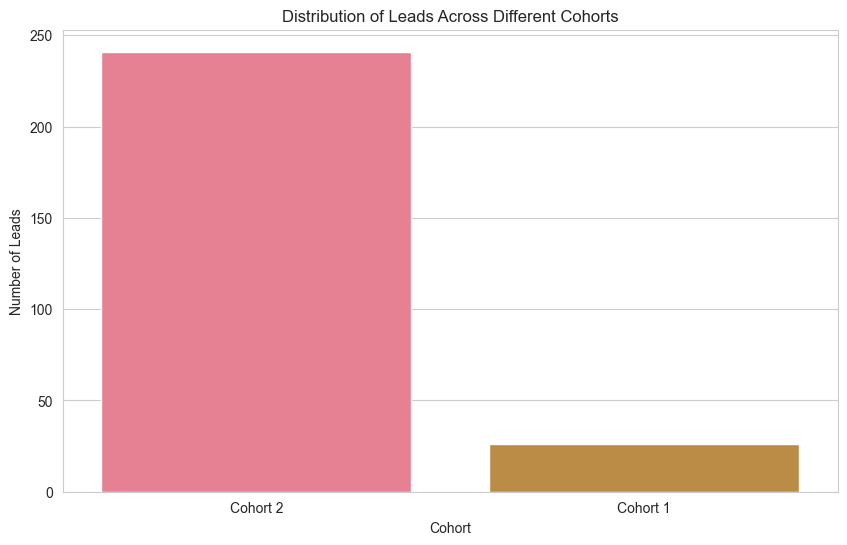

In [117]:

# 1. Distribution of leads across different cohorts
plt.figure(figsize=(10, 6))
sns.countplot(data=tokens_paid_df, x='cohort', palette=color_palette)
plt.title('Distribution of Leads Across Different Cohorts')
plt.xlabel('Cohort')
plt.ylabel('Number of Leads')
plt.show()

Insight: Cohort 2 has significantly more leads compared to Cohort 1, indicating that Cohort 2 had more successful lead generation efforts.

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/29223637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tokens_paid_df, y='source', order=tokens_paid_df['source'].value_counts().index, palette=color_palette)
/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/29223637.py:3: UserWarning: 
The palette list has fewer values (8) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=tokens_paid_df, y='source', order=tokens_paid_df['source'].value_counts().index, palette=color_palette)


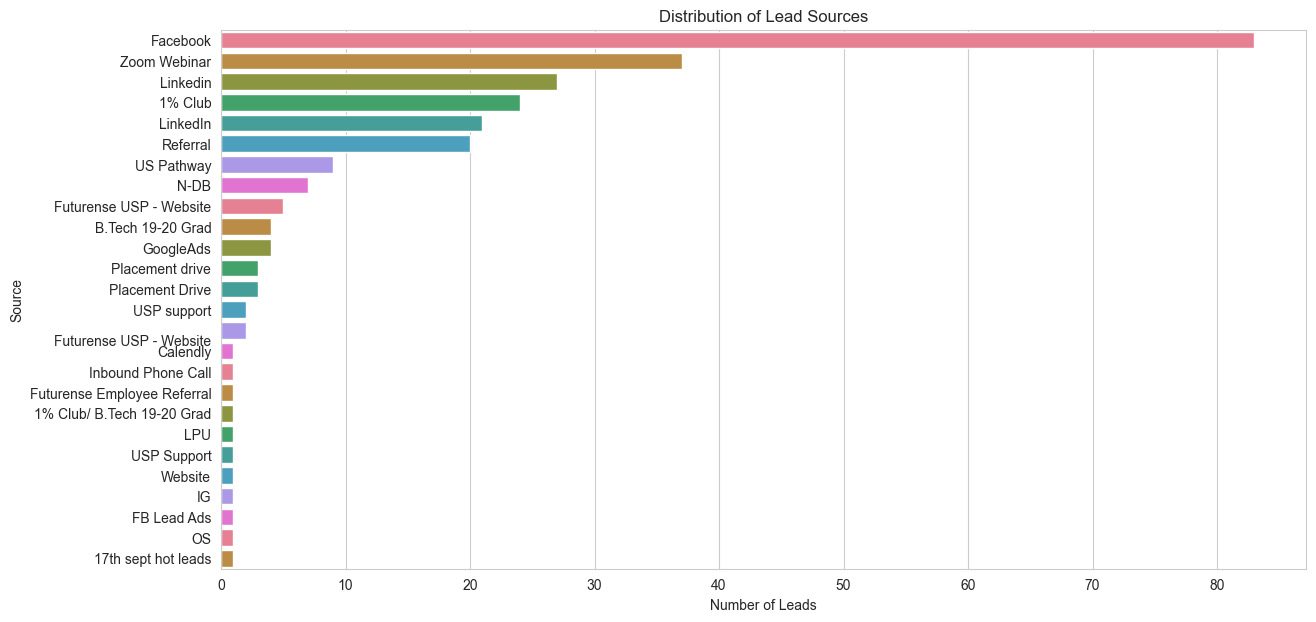

In [97]:
# 2. Distribution of lead sources
plt.figure(figsize=(14, 7))
sns.countplot(data=tokens_paid_df, y='source', order=tokens_paid_df['source'].value_counts().index, palette=color_palette)
plt.title('Distribution of Lead Sources')
plt.xlabel('Number of Leads')
plt.ylabel('Source')
plt.show()


Insight: Facebook is the most common source of leads, followed by Zoom Webinars and LinkedIn. This indicates that Facebook is a significant channel for attracting potential leads, and webinars are also an effective method for lead generation.

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/1550151678.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=tokens_paid_df, x='created_date', y='paid_date', hue='status', palette=color_palette)


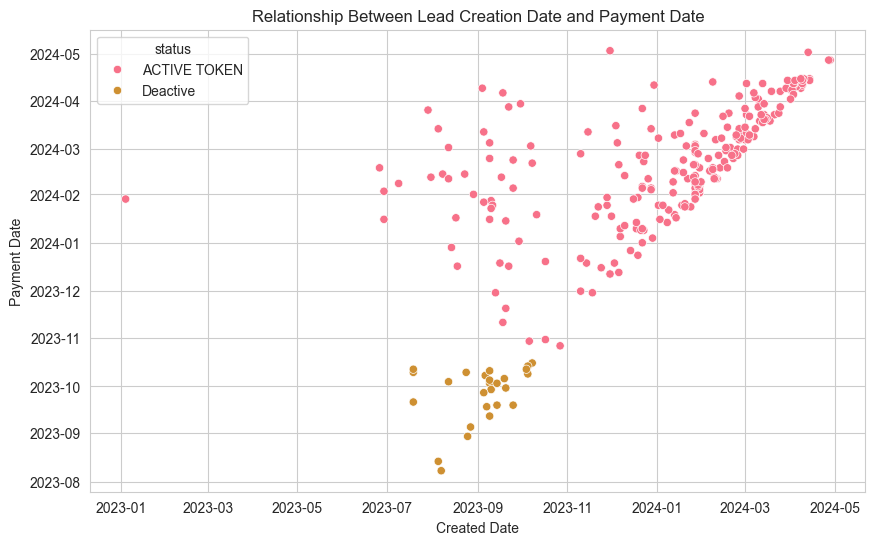

In [98]:
# 3. Relationship between lead creation date and payment date
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tokens_paid_df, x='created_date', y='paid_date', hue='status', palette=color_palette)
plt.title('Relationship Between Lead Creation Date and Payment Date')
plt.xlabel('Created Date')
plt.ylabel('Payment Date')
plt.show()


Insight: There is a positive correlation between the lead creation date and the payment date for active tokens, indicating that leads generally convert to payments within a relatively short period after their creation. Most of the active tokens show a consistent pattern of payment following creation, while deactivated leads tend to cluster within a short timeframe around late 2023. This suggests that leads created around this period were less likely to convert to active tokens.


/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/1324480701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tokens_paid_df, y='agent', order=tokens_paid_df['agent'].value_counts().index, palette=color_palette)
/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/1324480701.py:3: UserWarning: 
The palette list has fewer values (8) than needed (43) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=tokens_paid_df, y='agent', order=tokens_paid_df['agent'].value_counts().index, palette=color_palette)


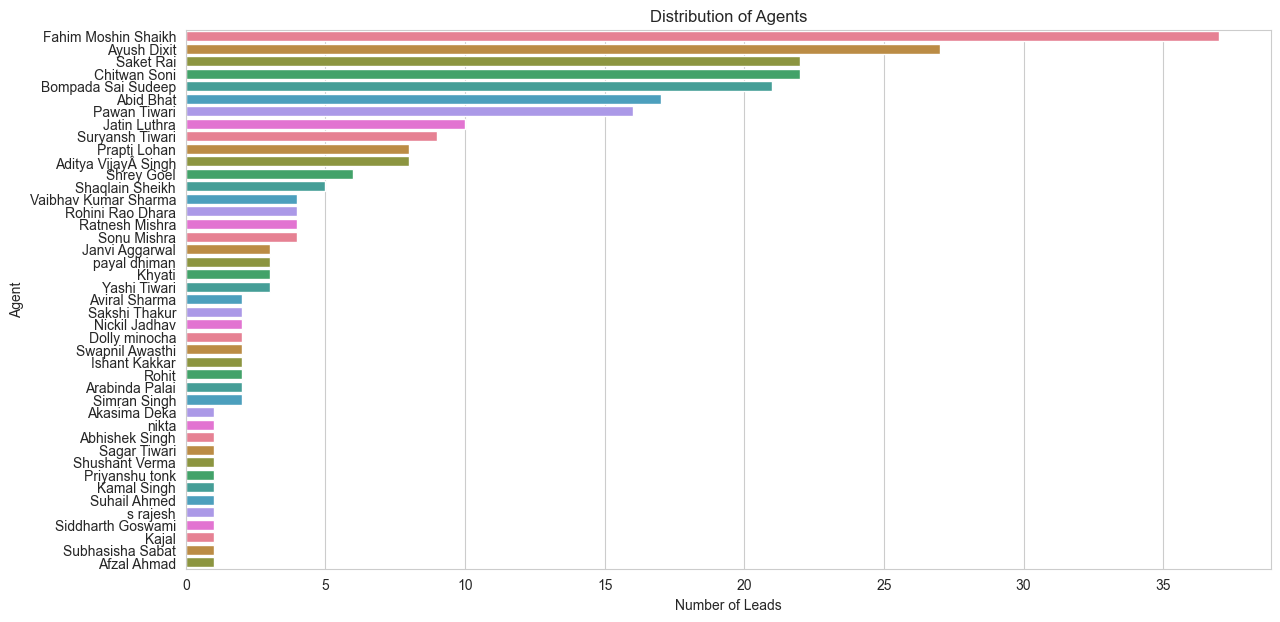

In [107]:
# 4. Distribution of agents
plt.figure(figsize=(14, 7))
sns.countplot(data=tokens_paid_df, y='agent', order=tokens_paid_df['agent'].value_counts().index, palette=color_palette)
plt.title('Distribution of Agents')
plt.xlabel('Number of Leads')
plt.ylabel('Agent')
plt.show()

Insight: Fahim Moshin Shaikh has the highest number of leads, followed by Ayush Dixit and Saket Rai. This indicates that these agents have either higher workloads or are more successful in acquiring leads. This could be due to their effectiveness, experience, or other factors contributing to their higher performance in lead generation.

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/3769014827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tokens_paid_df, x='status', palette=color_palette)
/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_5958/3769014827.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=tokens_paid_df, x='status', palette=color_palette)


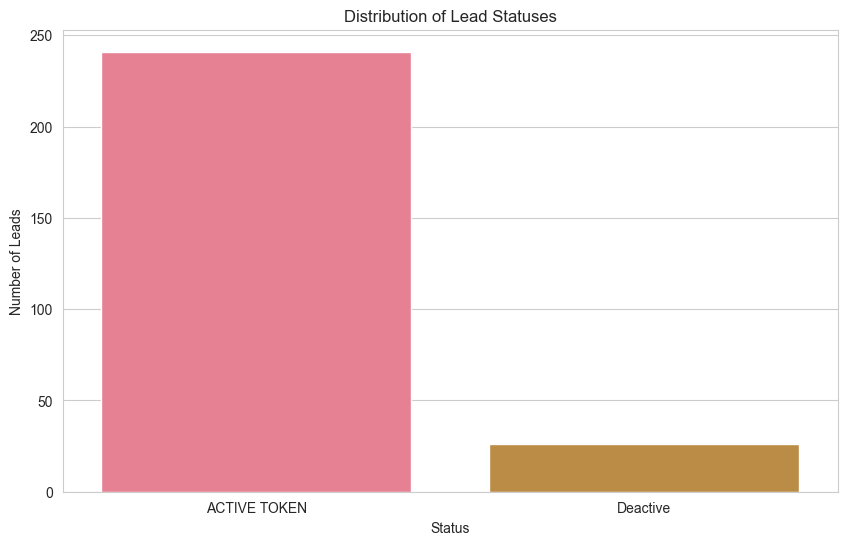

In [108]:
# 5. Distribution of lead statuses
plt.figure(figsize=(10, 6))
sns.countplot(data=tokens_paid_df, x='status', palette=color_palette)
plt.title('Distribution of Lead Statuses')
plt.xlabel('Status')
plt.ylabel('Number of Leads')
plt.show()

Insight: There are significantly more active tokens compared to deactivated leads. This indicates a higher conversion rate of leads into active tokens, suggesting that the majority of leads generated are successfully converted and maintained as active tokens. This reflects positively on the overall effectiveness of the lead management process.

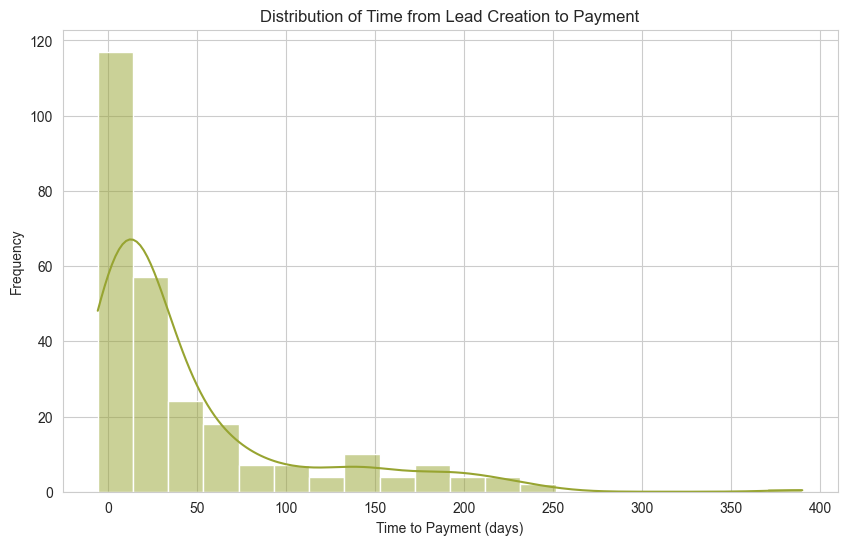

In [114]:
# 6. Average time from lead creation to payment
tokens_paid_df['created_date'] = pd.to_datetime(tokens_paid_df['created_date'])
tokens_paid_df['paid_date'] = pd.to_datetime(tokens_paid_df['paid_date'])
tokens_paid_df['time_to_payment'] = (tokens_paid_df['paid_date'] - tokens_paid_df['created_date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(tokens_paid_df['time_to_payment'].dropna(), bins=20, kde=True, color=color_palette[2])
plt.title('Distribution of Time from Lead Creation to Payment')
plt.xlabel('Time to Payment (days)')
plt.ylabel('Frequency')
plt.show()

Insight: The majority of payments occur within a short period after lead creation, with a sharp decline in frequency as the time to payment increases. Most payments are made within the first 30 days, indicating that quick conversion is common. The frequency of payments significantly decreases after 50 days, suggesting that leads are less likely to convert to payments if they don't do so relatively quickly.

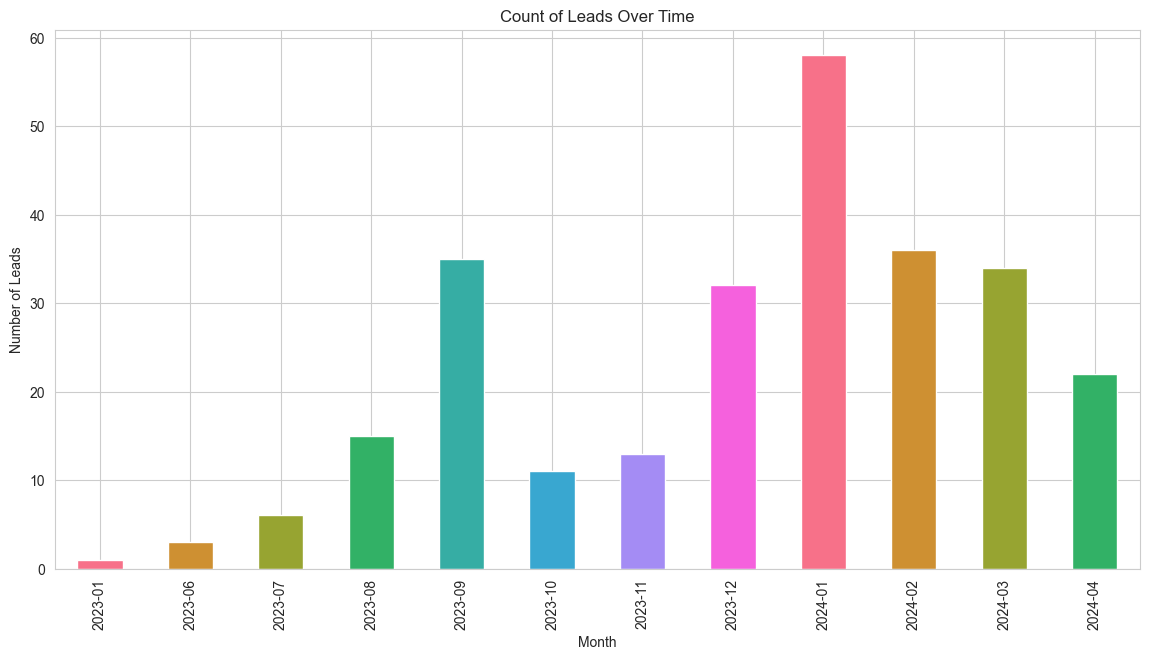

In [110]:
# 7. Count of leads over time
plt.figure(figsize=(10, 6))
tokens_paid_df['created_month'] = tokens_paid_df['created_date'].dt.to_period('M')
lead_counts = tokens_paid_df['created_month'].value_counts().sort_index()
lead_counts.plot(kind='bar', figsize=(14, 7), color=color_palette)
plt.title('Count of Leads Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.show()


Insight: There is a notable increase in the number of leads over time, with a significant spike in January 2024, where the number of leads reaches its peak. This suggests a successful lead generation strategy or campaign during this period. The leads count shows an upward trend from August 2023, indicating a steady increase in lead generation efforts or effectiveness over time. There are some fluctuations, but the general trend appears positive with the highest activity observed at the beginning of 2024.

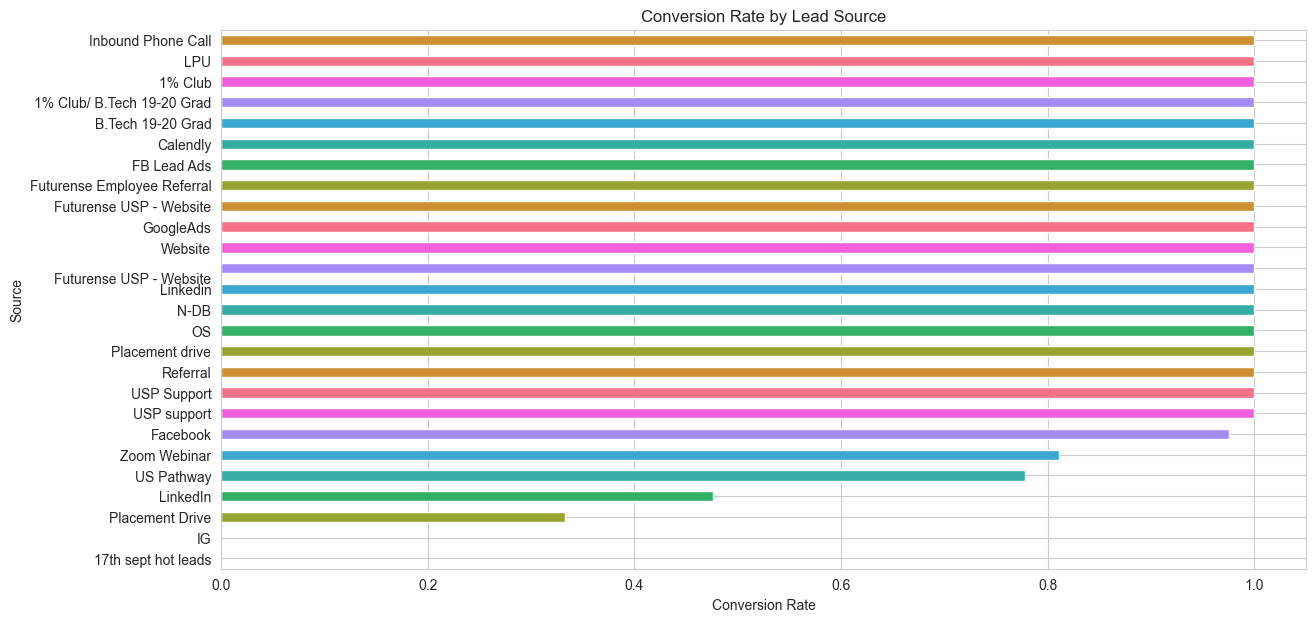

In [111]:

# 8. Effectiveness of different sources in converting leads to active tokens
source_status = tokens_paid_df.groupby(['source', 'status']).size().unstack(fill_value=0)
source_status['conversion_rate'] = source_status['ACTIVE TOKEN'] / source_status.sum(axis=1)

plt.figure(figsize=(14, 7))
source_status['conversion_rate'].sort_values().plot(kind='barh', color=color_palette)
plt.title('Conversion Rate by Lead Source')
plt.xlabel('Conversion Rate')
plt.ylabel('Source')
plt.show()


Insight: Inbound Phone Calls have the highest conversion rate, suggesting that direct interactions might be more effective in converting leads to active tokens.

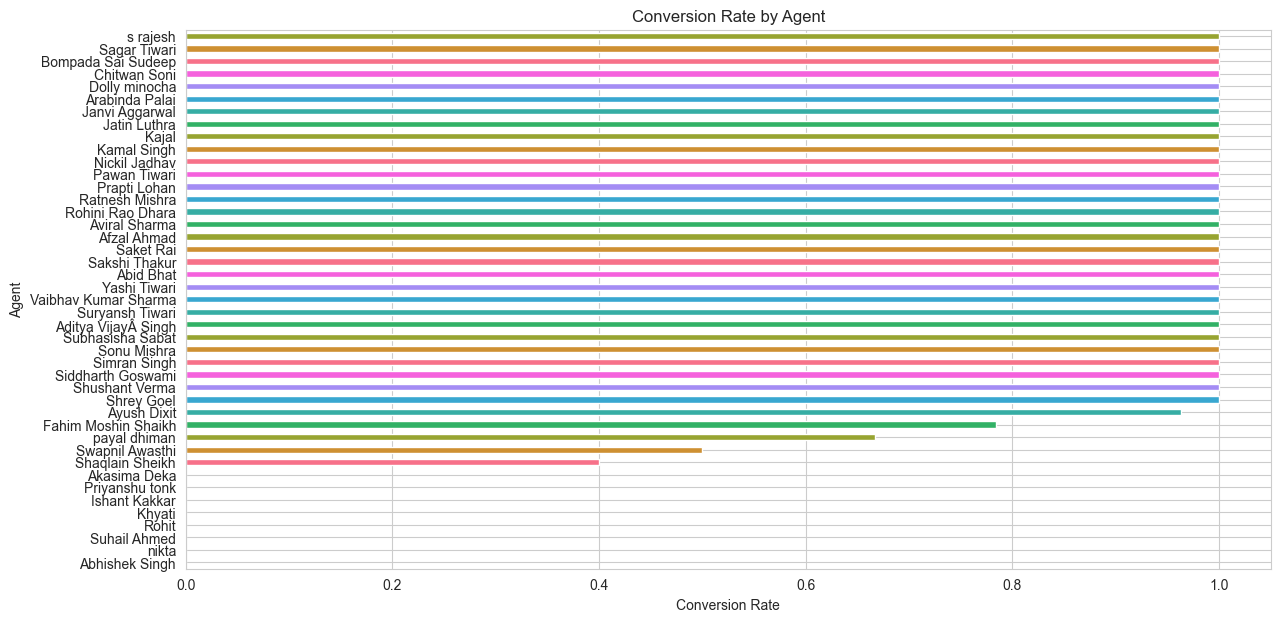

In [112]:

# 9. Performance comparison of agents
agent_status = tokens_paid_df.groupby(['agent', 'status']).size().unstack(fill_value=0)
agent_status['conversion_rate'] = agent_status['ACTIVE TOKEN'] / agent_status.sum(axis=1)

plt.figure(figsize=(14, 7))
agent_status['conversion_rate'].sort_values().plot(kind='barh', color=color_palette)
plt.title('Conversion Rate by Agent')
plt.xlabel('Conversion Rate')
plt.ylabel('Agent')
plt.show()

Insight: Agents like Siddharth Goswami have higher conversion rates, indicating that their methods or interactions with leads might be more effective.

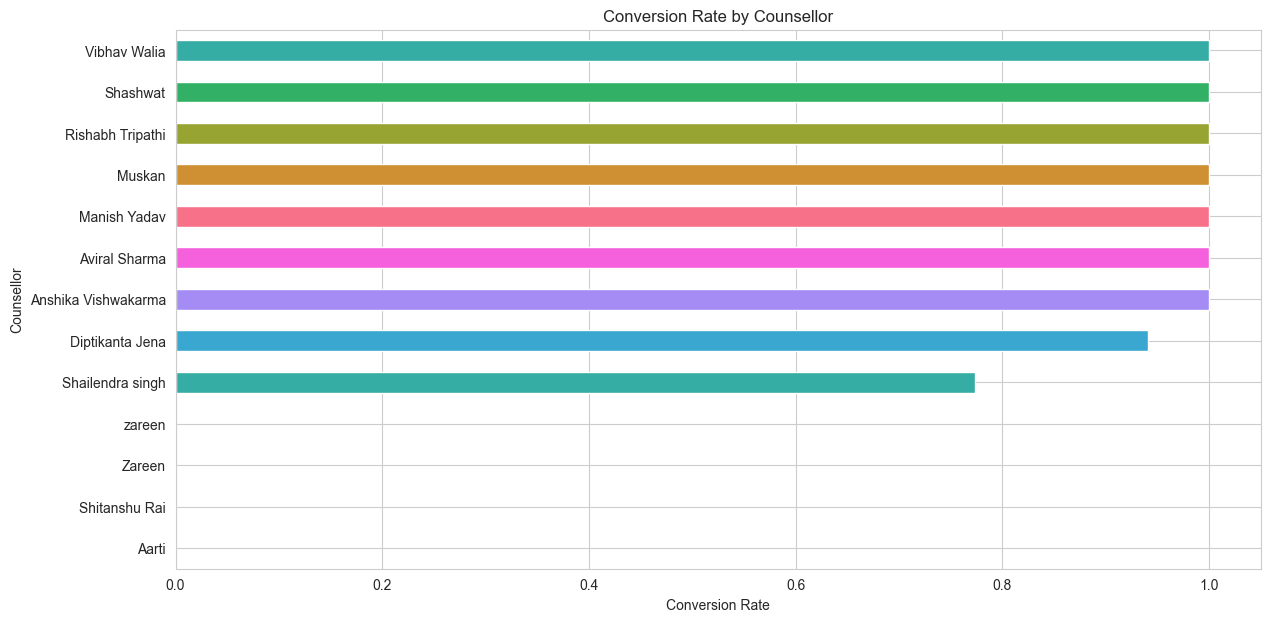

In [113]:
# 10. Impact of counselors on lead status
counsellor_status = tokens_paid_df.groupby(['counsellor', 'status']).size().unstack(fill_value=0)
counsellor_status['conversion_rate'] = counsellor_status['ACTIVE TOKEN'] / counsellor_status.sum(axis=1)

plt.figure(figsize=(14, 7))
counsellor_status['conversion_rate'].sort_values().plot(kind='barh', color=color_palette)
plt.title('Conversion Rate by Counsellor')
plt.xlabel('Conversion Rate')
plt.ylabel('Counsellor')
plt.show()

Insight: Counselors like Aviral Sharma have higher conversion rates, suggesting that their counseling methods are more effective in converting leads to active tokens.